<a href="https://colab.research.google.com/github/SrinivasSistlaKL/Mainflow_internship_dataanalysis_task1/blob/main/task6mainflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

# Load the provided CSV file
file_path = 'disney_plus_titles.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head(), df.columns


(  show_id     type                           title  \
 0      s1    Movie                   A Spark Story   
 1      s2    Movie                  Spooky Buddies   
 2      s3    Movie          The Fault in Our Stars   
 3      s4  TV Show                 Dog: Impossible   
 4      s5  TV Show  Spidey And His Amazing Friends   
 
                      director  \
 0  Jason Sterman, Leanne Dare   
 1                Robert Vince   
 2                  Josh Boone   
 3                         NaN   
 4                         NaN   
 
                                                 cast                country  \
 0                      Apthon Corbin, Louis Gonzales                    NaN   
 1  Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...  United States, Canada   
 2  Shailene Woodley, Ansel Elgort, Laura Dern, Sa...          United States   
 3                                       Matt Beisner          United States   
 4  Benjamin Valic, Lily Sanfelippo, Jakari Fraser...         

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


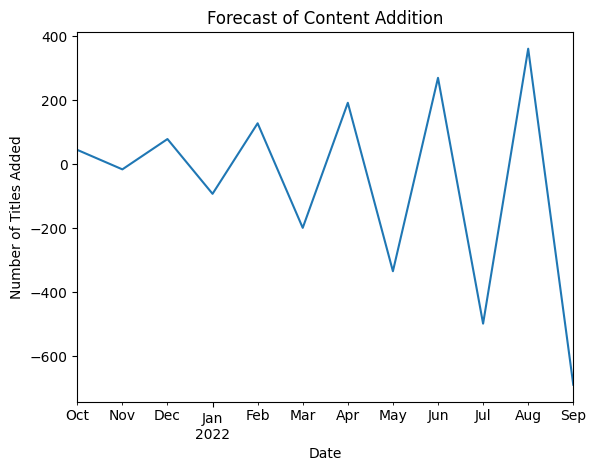

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Preprocess date column
df['date_added'] = pd.to_datetime(df['date_added'])

# Aggregate data by month
monthly_data = df.groupby(df['date_added'].dt.to_period('M')).size()

# Fit ARIMA model
model = ARIMA(monthly_data, order=(5,1,0))
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)
forecast.plot()
plt.title('Forecast of Content Addition')
plt.xlabel('Date')
plt.ylabel('Number of Titles Added')
plt.show()


In [12]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Perform sentiment analysis on the description column
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['description'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Display sentiment distribution
print(df[['title', 'description', 'sentiment']].head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                            title  \
0                   A Spark Story   
1                  Spooky Buddies   
2          The Fault in Our Stars   
3                 Dog: Impossible   
4  Spidey And His Amazing Friends   

                                         description  sentiment  
0  Two Pixar filmmakers strive to bring their uni...     0.2263  
1  The puppies go on a spooky adventure through a...    -0.2023  
2  Hazel and Gus share a love that sweeps them on...     0.7506  
3  Matt Beisner uses unique approaches to modifyi...     0.0000  
4  Spidey teams up with pals to become The Spidey...     0.0000  


In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preprocess data: convert duration to numeric, extract number of seasons if available
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)

# Select features for clustering
features = df[['release_year', 'duration_numeric']].dropna()

# Preprocess features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Display cluster assignments
print(df[['title', 'release_year', 'duration', 'cluster']].head())


                            title  release_year   duration  cluster
0                   A Spark Story          2021     88 min        0
1                  Spooky Buddies          2011     93 min        0
2          The Fault in Our Stars          2014    127 min        0
3                 Dog: Impossible          2019  2 Seasons        2
4  Spidey And His Amazing Friends          2021   1 Season        2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
